In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from tsgen import TsGenerator

In [2]:
tsgen = TsGenerator()

In [3]:
datafolders = ["D:\\processing\\win\\COARI",
              "D:\\processing\\win\\FONTE_BOA",
              "D:\\processing\\win\\MADEIRA",
              "D:\\processing\\win\\MANACAPURU",
              "D:\\processing\\win\\NEGRO",
              "D:\\processing\\win\\TEFE"]

In [ ]:
# subset_path = os.path.join(datafolders[0],os.listdir(datafolders[0])[0])
prettydate = 'S3B_OL_2_WFR____20191002T140633_20191002T140933_20191003T222714_0179_030_281_3060_MAR_O_NT_002_subset.txt'
# prettydate = 'S3A_OL_2_WFR____20191231T141226_20191231T141526_20200105T031511_0179_053_167_3060_MAR_O_NT_002_subset.txt'
# prettydate = 'S3B_OL_2_WFR____20200214T140633_20200214T140933_20200215T210517_0179_035_281_3060_MAR_O_NT_002_subset.txt'
subset_path = os.path.join(datafolders[0],prettydate)
subset_path

In [ ]:
# read text file and convert to pandas dataframe
df = pd.read_csv(subset_path, sep='\t', skiprows=1)

In [ ]:
df.columns.values

## GDAL

In [22]:
from osgeo import gdal
import numpy as np

In [5]:
filename = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002_processed.tif'

In [7]:
SourceDS = gdal.Open(filename)

In [9]:
projection = SourceDS.GetProjection()
geo_transform = SourceDS.GetGeoTransform()

In [10]:
print(projection,'\n --- \n',geo_transform)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]] 
 --- 
 (-64.66684894352004, 0.002888197418897582, 0.0, -0.1263540012212161, 0.0, -0.002888197418897582)


In [34]:
SourceDS.ReadAsArray().shape

(16, 4577, 4866)

C:\Users\david\.conda\envs\git-prj\lib\site-packages\matplotlib\image.py:468: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
C:\Users\david\.conda\envs\git-prj\lib\site-packages\matplotlib\image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)
C:\Users\david\.conda\envs\git-prj\lib\site-packages\matplotlib\colors.py:1026: RuntimeWarning: overflow encountered in float_scalars
  resdat /= (vmax - vmin)
C:\Users\david\.conda\envs\git-prj\lib\site-packages\matplotlib\colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Users\david\.conda\envs\git-prj\lib\site-packages\matplotlib\colors.py:581: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


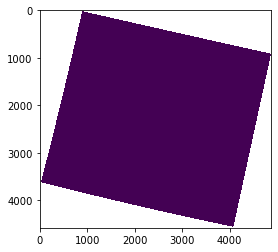

In [41]:
plt.imshow(SourceDS.ReadAsArray()[0])

In [11]:
def array2raster(filename, array, geo_transform, projection, nodatavalue=0, dtype=gdal.GDT_Float32):

    cols = array.shape[1]
    rows = array.shape[0]

    print('Saving image: ' + filename)

    driver = gdal.GetDriverByName('GTiff')
    out_raster = driver.Create(filename, cols, rows, 1, dtype, options=['COMPRESS=PACKBITS'])
    out_raster.SetGeoTransform(geo_transform)
    out_raster.SetProjection(projection)
    outband = out_raster.GetRasterBand(1)
    outband.SetNoDataValue(nodatavalue)
    outband.WriteArray(array)
    outband.FlushCache()
    return

In [39]:
# Read iCOR cloud mask
cloudmask = r'D:\processing\win\icor_mask\S3B_OL_1_EFR____20190722T133256_20190722T133556_20190723T181207_0179_028_024_3060_LN1_O_NT_002_SEN3_cloudmask.tif'
cloudm_raster = gdal.Open(cloudmask)

In [40]:
# cloudm_raster.SetProjection(projection)
# cloudm_raster.SetGeoTransform(geo_transform)
cloudm_raster.ReadAsArray().shape

(4091, 4865)

In [14]:
cloudm_rasterArray = cloudm_raster.ReadAsArray()

In [16]:
cloudm_rasterArray.shape

(4091, 4865)

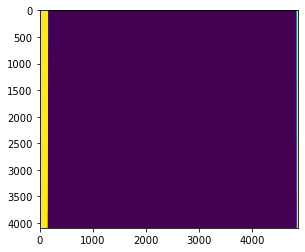

In [17]:
plt.imshow(cloudm_rasterArray)
plt.show()

In [26]:
cloudm_rasterArray.max()

255

In [31]:
Masked_CloudrasterArray = np.ma.masked_equal(cloudm_rasterArray, 255)

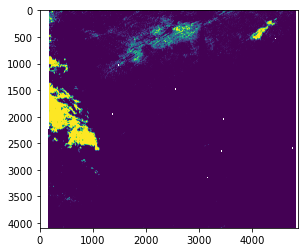

In [32]:
plt.imshow(Masked_CloudrasterArray)
plt.show()

In [33]:
array2raster(filename=r'D:\processing\win\icor_mask\py_out\geo_cloud_mask.tif',
             array=cloudm_rasterArray,
             geo_transform=geo_transform,
             projection=projection, 
             nodatavalue=255)

Saving image: D:\processing\win\icor_mask\py_out\geo_cloud_mask.tif
